In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit

In [2]:
@njit(fastmath=True)
def solve_2d_Burger():
    ###variable declarations
    nx = 41
    ny = 41
    nt = 420
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    sigma = .0009
    nu = 0.01
    dt = sigma * dx * dy / nu
    
    
    x = numpy.linspace(0, 2, nx)
    y = numpy.linspace(0, 2, ny)
    
    u = numpy.ones((ny, nx))  # create a 1xn vector of 1's
    v = numpy.ones((ny, nx))
    un = numpy.ones((ny, nx)) 
    vn = numpy.ones((ny, nx))
    
    ###Assign initial conditions
    
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    for n in range(nt + 1): ##loop across number of time steps
        un = u.copy()
        vn = v.copy()
        
        for j in range(2, row):
            for i in range(2, col):
            
                u[j-1, i-1] = (un[i-1, j-1] -
                                 dt / dx * un[j-1, i-1] * 
                                 (un[j-1, i-1] - un[j-1, i-2]) - 
                                 dt / dy * vn[j-1, i-1] * 
                                 (un[j-1, i-1] - un[j-2, i-1]) + 
                                 nu * dt / dx**2 * 
                                 (un[j-1, i] - 2 * un[j-1, i-1] + un[j-1, i-2]) + 
                                 nu * dt / dy**2 * 
                                 (un[j, i-1] - 2 * un[j-1, i-1] + un[j-2, i-1]))
                
                v[j-1, i-1] = (vn[j-1, i-1] - 
                                 dt / dx * un[j-1, i-1] *
                                 (vn[j-1, i-1] - vn[j-1, i-2]) -
                                 dt / dy * vn[j-1, i-1] * 
                                (vn[j-1, i-1] - vn[j-2, i-1]) + 
                                 nu * dt / dx**2 * 
                                 (vn[j-1, i] - 2 * vn[j-1, i-1] + vn[j-1, i-2]) +
                                 nu * dt / dy**2 *
                                 (vn[j, i-1] - 2 * vn[j-1, i-1] + vn[j-2, i-1]))
        
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
                
    return x, y, u


In [3]:
#compute the cpu time of the solving 2d Burgers equation
start = time.time()
start = time.time()
x, y, u = solve_2d_Burger()
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) )    

Execution time is : 1173.5577583312988 ms


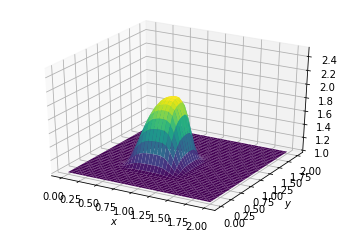

In [4]:
X, Y = numpy.meshgrid(x, y)
fig = pyplot.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
    linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');